# The Winter Heat Budget of Sea Ice in Kotzebue Sound: Residual Ocean Heat, Tidal Exchange, and the Pivotal Role of River Outflow


This notebook generates all the figures for the paper. First, download the data from Columbia Academic Commons (LINK), and specify the path to the data folder here:

TODO: 
- Make figure showing bi-dir currents and heat fluxes
- figure out how to calculate mixing lines and add to T-S diagram

In [1]:
#--------------------------------USER INPUT---------------------------------------
data_path = '../../Publications/Witte Ocean-Ice Heat Flux/Publication Version/Data/'
#---------------------------------------------------------------------------------

Now you can run the code in this notebook sequentially to generate the figures! Please note that the bulk of the code is called in the two accompanying python files, "Satellite_SeaIce_Toolbox.py" and "IkSi_Analysis_Toolbox.py".

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da
import cartopy.crs as ccrs
import cartopy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from osgeo import gdal, osr
import gsw
import windrose
import warnings
import pickle
import tqdm

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import colorcet as cc
%matplotlib inline

%load_ext autoreload
%autoreload

## Figure 1: Layered Sea Ice Cover Map

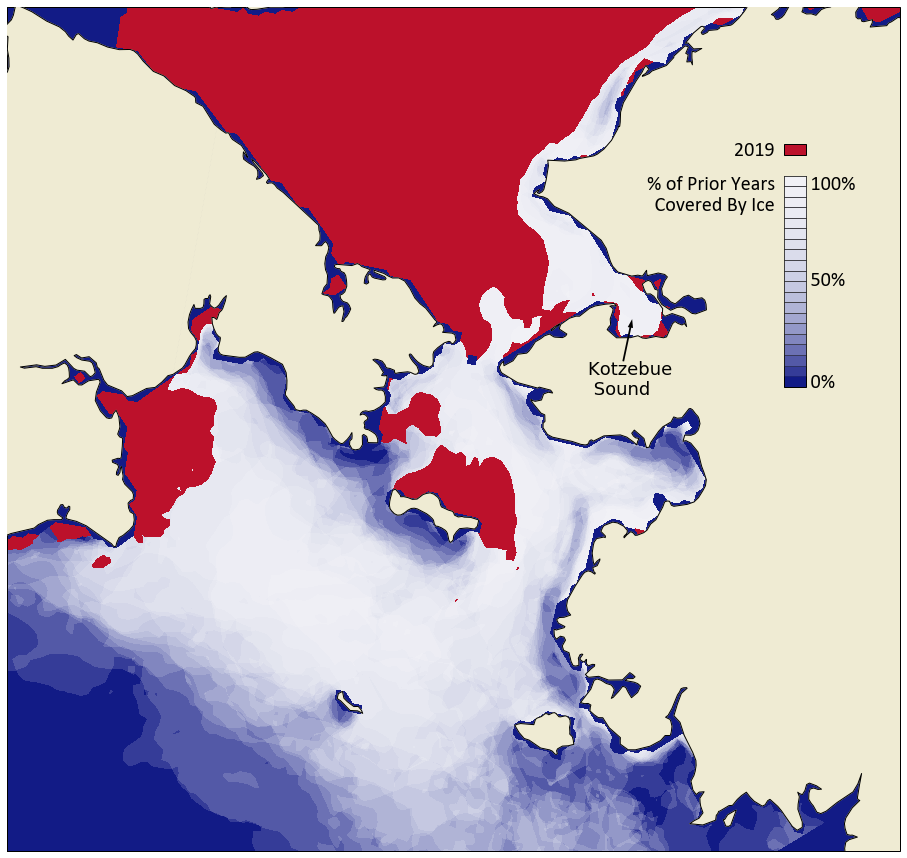

In [3]:
#open datasets of sea ice cover in Bering Strait region for 2000-2018 and 2019 (see Appendix 1 for how I got these datasets)
si = xr.open_dataset(data_path + 'Satellite/Sea Ice/si_2000_2018.nc')
si19 = xr.open_dataset(data_path + 'Satellite/Sea Ice/si_2019.nc')

#generate map of transparent sea ice cover + 2019 overlaid in red
from Satellite_SeaIce_Toolbox import plot_layered_ice_map
plot_layered_ice_map(si = si, 
                     si19 = si19, 
                     startDay = 91,       #first yearday of April 
                     endDay = 120,        #last yearday of April 
                     thresh = 70,         #minimum sea ice cover threshold to plot as "covered"
                     transparency = 0.15, #transparency of each layer. 0.15 will make a 100% value be about 96% opaque
                     plotflag = 0)        #set to 1 if you want to save figures for every year as it is added

plt.savefig('Figures/Layered Sea Ice Maps/AprSeaIceExtent_to_2019_notitle_nodatasource.png',dpi=300,facecolor='w')

## Figure 2: Sea Ice and SST Monthly Anomalies

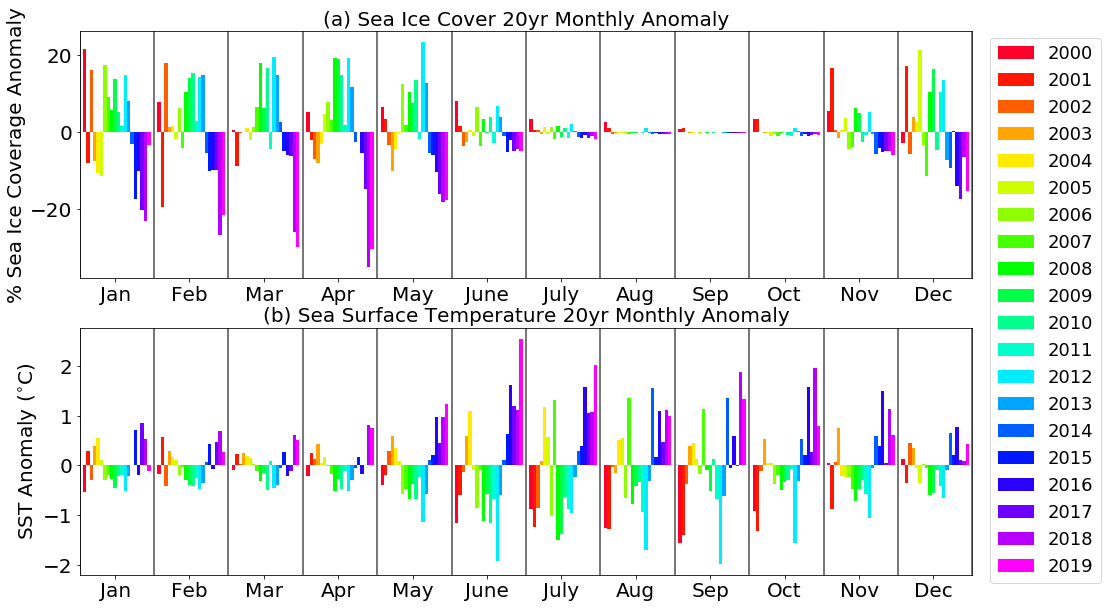

In [13]:
si_mask = xr.open_dataset(data_path + 'Satellite/Sea Ice/si_2000_2019_masked.nc')
sst = xr.open_dataset(data_path + 'Satellite/SST/oisst_BeringStraitRegion_2000-2019.nc')
plt.rcParams.update({'font.size': 20})

from Satellite_SeaIce_Toolbox import plot_monthly_anomalies
plot_monthly_anomalies(si = si_mask, sst = sst)

#plt.savefig('Figures/20Yr_Anomalies_v4.png',dpi=300,bbox_inches='tight')

## Figure 3: Layered Landfast Ice Extent Map

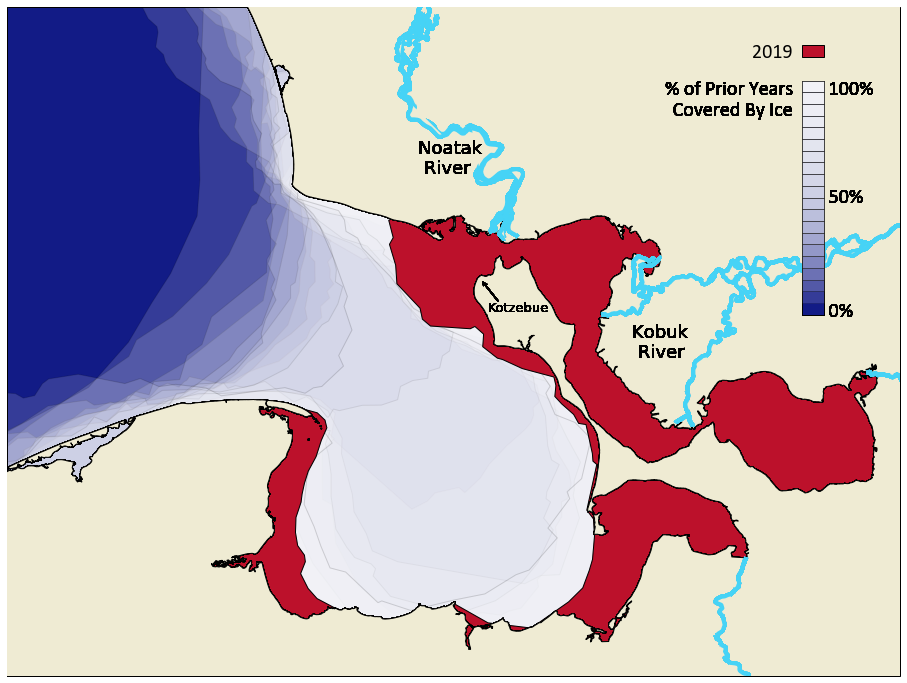

In [3]:
from Satellite_SeaIce_Toolbox import plot_layered_landfast_ice_map
plot_layered_landfast_ice_map(data_folder = data_path + 'Satellite/Landfast Ice/', 
                              coastline_path = data_path + 'GIS Data/Coastlines/Alaska_Coast_63360_py_KotzSoundRegion_WGS84.shp', 
                              river_path = data_path + 'GIS Data/Rivers/Major_Rivers_WGS84.shp', 
                              transparency = 0.15, 
                              xmin = -165.4, 
                              xmax = -160.1, 
                              ymin = 65.9, 
                              ymax = 67.55,
                              plotflag = 1)

plt.savefig(f'Figures/Layered Landfast Ice Maps/LandfastIce_to_2019_notitle_nodatasource.png',dpi=300,facecolor='w')

## Figure 4: Satellite View of Kotzebue Sound Breakup


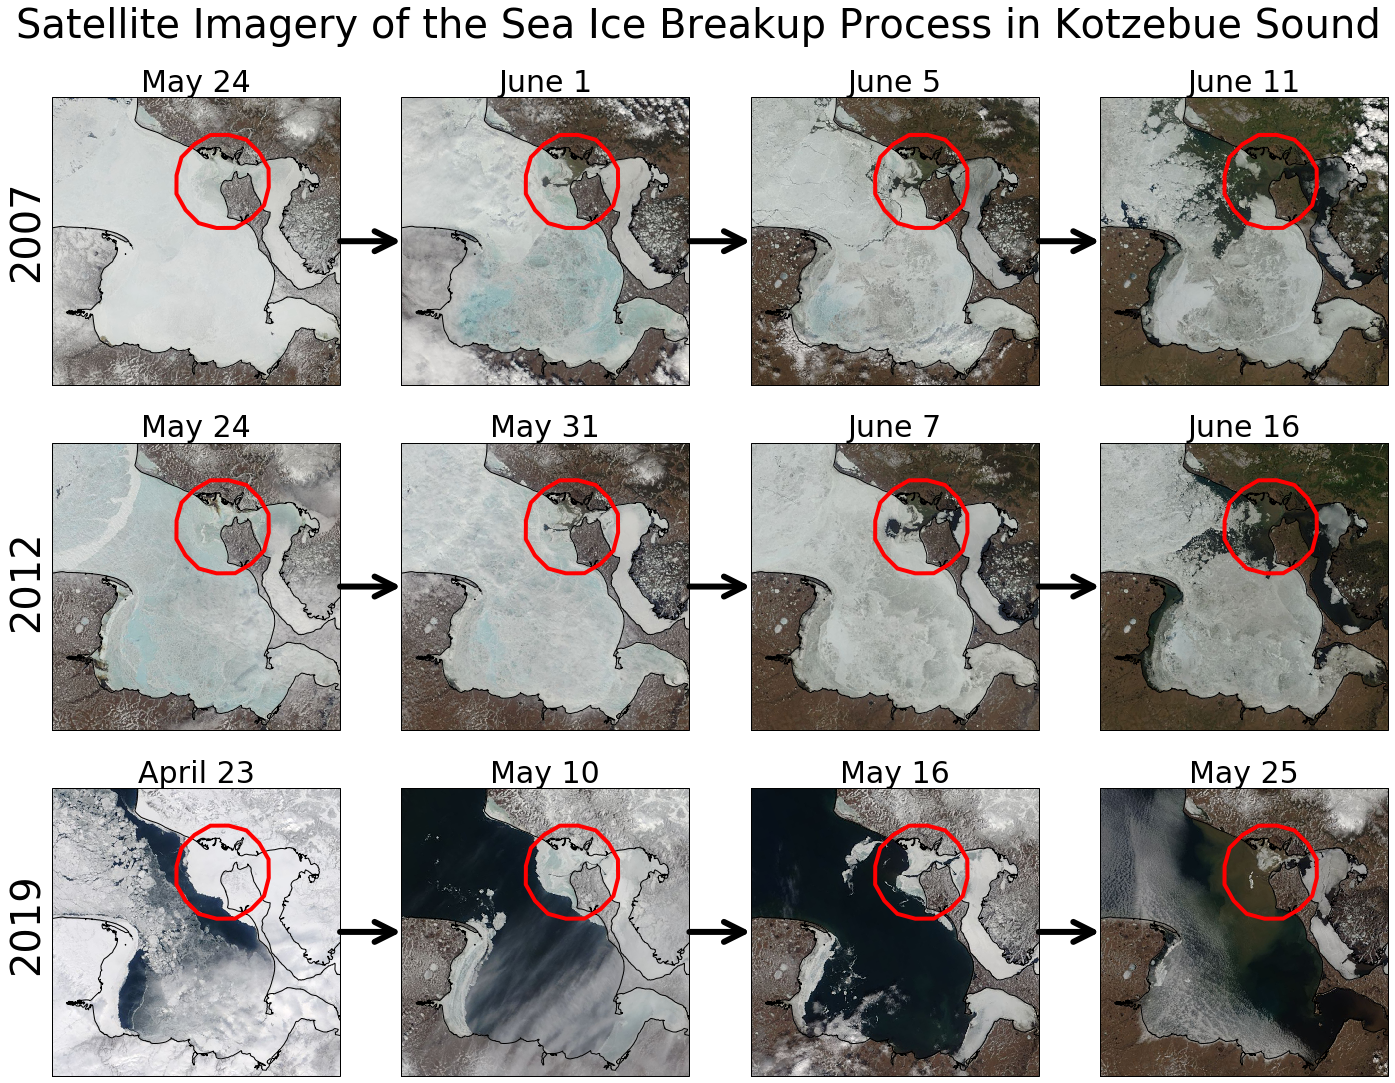

In [45]:
paths_2007 = [data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070524.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070601.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070605.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070611.tif']
paths_2012 = [data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120524.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120531.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120607.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120616.tif']
paths_2019 = [data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190423.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190510.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190516.tif',
              data_path + 'Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190525.tif']

coastline_path = data_path + 'GIS Data/Coastlines/Alaska_Coast_63360_py_KotzSoundRegion_WGS84.shp'

from Satellite_SeaIce_Toolbox import plot_breakup_images
plot_breakup_images(paths_2007, paths_2012, paths_2019, coastline_path, 
                    lon_min_MOD = -164.3, 
                    lon_max_MOD = -161.3, 
                    lat_min_MOD = 66, 
                    lat_max_MOD = 67.2, 
                    fontsz = 30,
                    figsz = (24,18))

#plt.savefig('./Figures/Breakup_Images_v3.png',dpi=300)

## Figure 5: Measurement Stations in Kotzebue Sound

(made in powerpoint)

<img src='Locations and Measurements v3.png'>

## Figure 6: Overview of ITO Measurements

In [7]:
#----Declare Variables----
lat, lon = 66.8968, -162.6139
start, end = pd.datetime(2019,1,7,22,45,0), pd.datetime(2019,4,1,20,0,0)

#----Load QC'd Data-------
aqd2dir = xr.open_dataset(data_path + 'Ice-Tethered Observatory/aquadopp_currents_2dir.nc')
aqd2dir = aqd2dir.where(aqd2dir.bindepth>1)
aqdXr = xr.open_dataset(data_path + 'Ice-Tethered Observatory/aquadopp_currents_full.nc')
tempsXr = xr.open_dataarray(data_path + 'Ice-Tethered Observatory/temperature_uninterpolated.nc')
tempsXrInterp = xr.open_dataarray(data_path + 'Ice-Tethered Observatory/temperature_profile.nc')
rbr = pd.read_csv(data_path + 'Ice-Tethered Observatory/concerto_10min.csv',index_col=0,parse_dates=True)
maximet = pd.read_csv(data_path + 'Ice-Tethered Observatory/maximet_10min.csv',index_col=0,parse_dates=True)
cnr_rsmpl = pd.read_csv(data_path + 'Ice-Tethered Observatory/cnr_10min.csv',index_col=0,parse_dates=True)
mbs_mean = pd.read_csv(data_path + 'Ice-Tethered Observatory/mbs_mean.csv',index_col=0,parse_dates=True)
fws_rsmpl = pd.read_csv(data_path + 'Ice-Tethered Observatory/fws_10min.csv',index_col=0,parse_dates=True)

In [8]:
#temporally align vectors
start, end = pd.datetime(2019,1,7,22,45,0), pd.datetime(2019,4,1,20,0,0)
start2,end2 = pd.datetime(2019,1,8,0,0,0),pd.datetime(2019,3,31)
mm_crop = maximet.loc[start2:end2]
cnr_crop = cnr_rsmpl.loc[start2:end2].drop(columns=['RECORD','NetSW_Avg','NetLW_Avg','NetRad_Avg','NetRad','PTemp_C','BattV'])
mbs_crop = mbs_mean.dropna().resample('10min').mean().interpolate().loc[start2:end2]
Fw_crop = Fw_92.to_pandas().resample('10min').mean().interpolate().loc[start2:end2]

#----------------UPPER BOUNDARY--------------------
#constants
ki = 2.1 #W/m/K
ks = 0.3 #W/m/K
rhoa = 1.2 #kg/m^3
cp = 1000  #J/kg/K
Chz = 2*10**(-3) #dimensionless

#inputs
Ta = mm_crop.Temperature + 273.15
Uz = mm_crop.Speed
F_lw = -cnr_crop.NetLW #given with + into surface, so have to reverse
F_sw = -cnr_crop.NetSW #given with + into surface, so have to reverse
Hs = -mbs_crop.SnowMean
Hi = mbs_crop.IceMean
Tf = np.zeros(len(mm_crop)) + 273

To = ( -F_lw - F_sw + (Ta * rhoa * cp * Chz * Uz) + (Tf / ((Hi/ki) + (Hs/ks))) )/((rhoa * cp * Chz * Uz) + (1 / ((Hi/ki) + (Hs/ks))))
Fc = (To - Tf) / ((Hi/ki) + (Hs/ks)) #conductive
Fs = (rhoa * cp * Chz * Uz)*(To-Ta)  #sensible


roll_hrs = 24*2
linewd = 3

#minimize the residual between Fw and Fc, use that to scale Fw
Fc_plot = Fc.rolling(6*roll_hrs,center=True,min_periods=None).mean().where(Fc<0)
Fw_plot = Fw_crop.rolling(6*roll_hrs,center=True,min_periods=2).mean()
scale = np.mean(-Fc_plot/Fw_plot)
resid = Fc_plot + scale*Fw_plot

In [9]:
currents = aqd2dir.mean(dim='bindepth').speed#.rolling({'time':10}).mean()
currents

<xarray.DataArray 'speed' (time: 8054)>
array([-0.621333, -0.648556, -0.627667, ..., -0.371667, -0.394667, -0.385333])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-07T22:45:00 ... 2019-04-01T20:00:00

In [18]:
resample_freq = '4H'
loffset = '2H'
sal_rsmpl = rbr.Salinity.resample(resample_freq,loffset=loffset).mean()
dSaldt = pd.Series(np.gradient(sal_rsmpl.values),sal_rsmpl.index)

temp_rsmpl = rbr.Temperature.resample(resample_freq,loffset=loffset).mean()
dTempdt = pd.Series(np.gradient(temp_rsmpl.values),temp_rsmpl.index)

In [13]:
dT = rbr.deltaT_Adjusted
sal = rbr.Salinity_Adjusted
from scipy import signal
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

#initialize final filtering parameters
period = 10                 #sampling period of salinity timeseries is 10min
fs = 1/(period*60)          #convert from period minutes to Hz (1/s)
max_period = 3*24*60        #how many minutes to make the cutoff frequency (days*hours*minutes)
cutoff = 1/(max_period*60)  #cutoff frequency in Hz

filtered_Sal = butter_highpass_filter(sal, cutoff, fs, order=1)

sal_hp = pd.Series(data=filtered_Sal,index=sal.index)

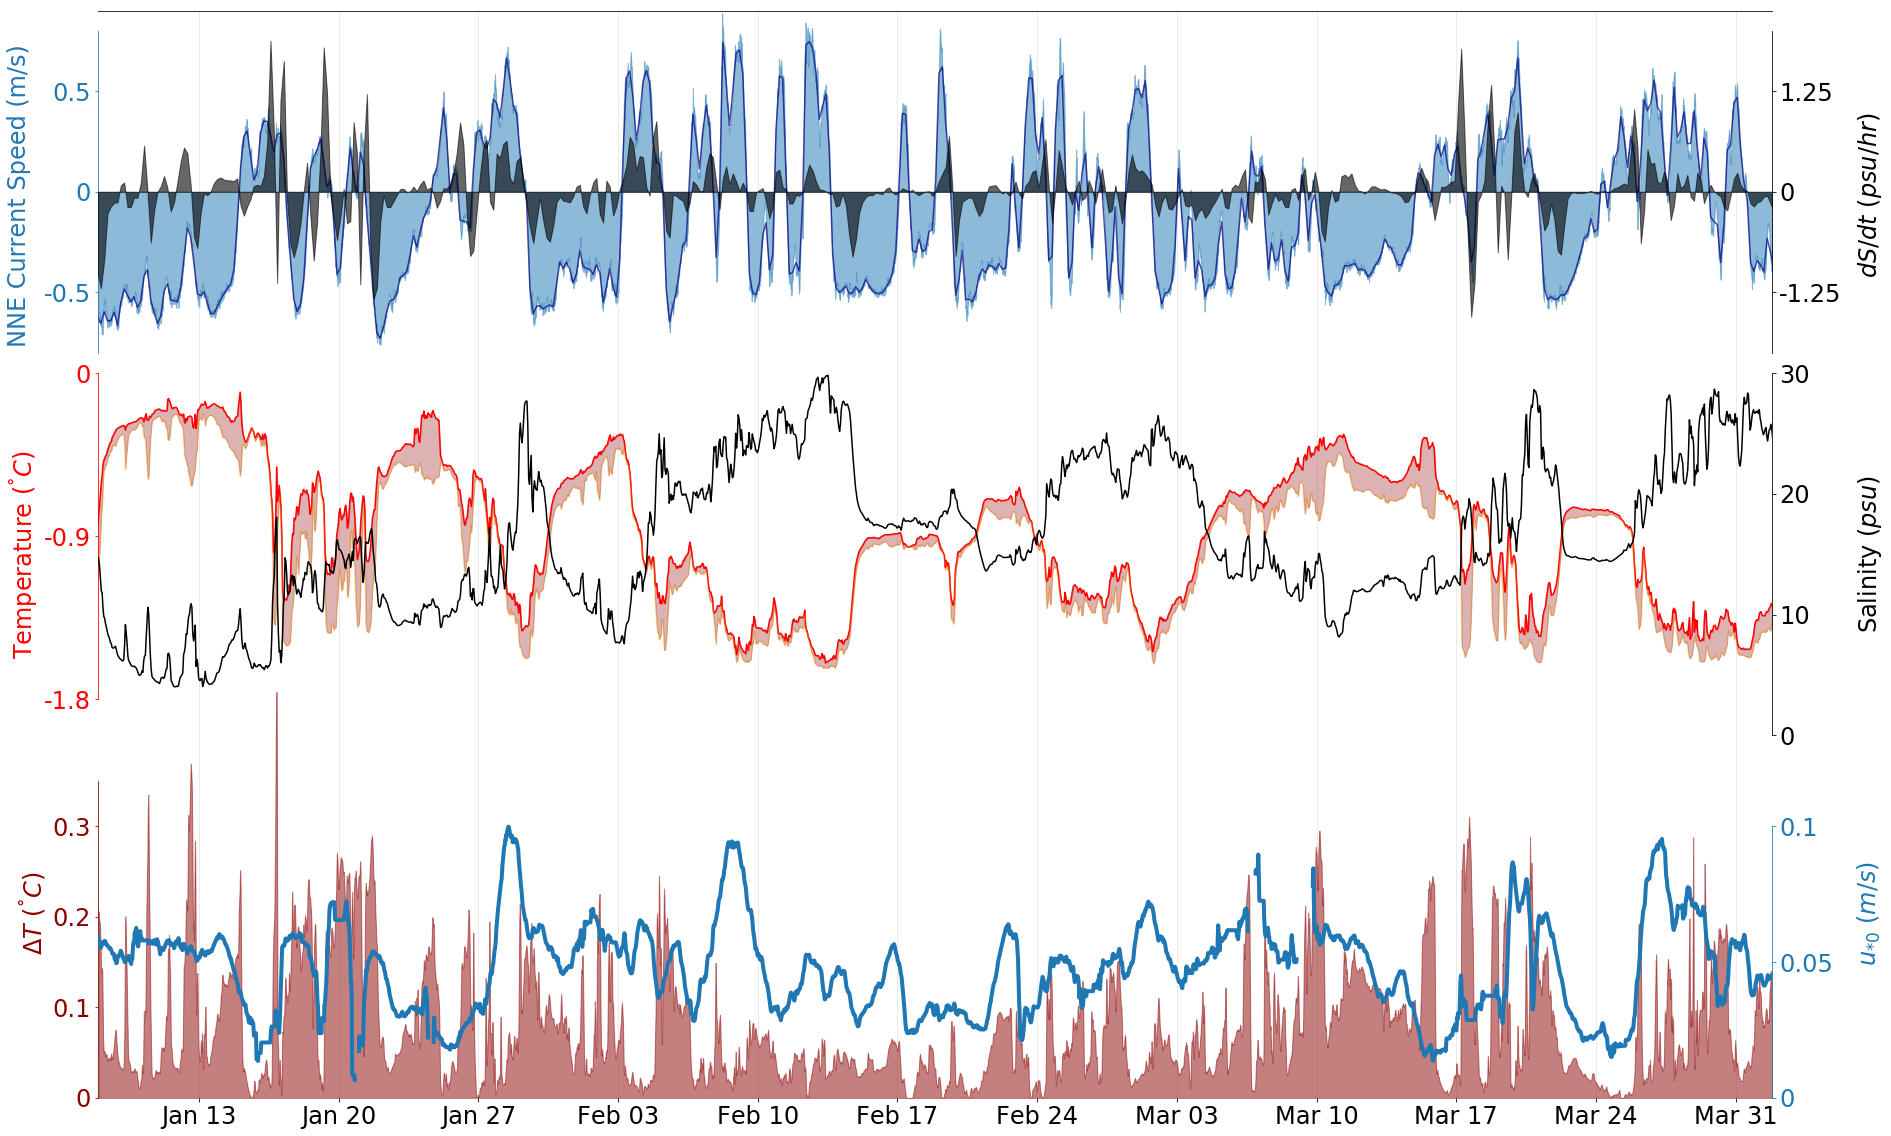

In [158]:
fig,axx = plt.subplots(figsize=(30,20),facecolor='w')

#-------CURRENTS------------------
ccolor = 'C0'
axx.fill_between(currents.time.values, currents.values, alpha=0.5,color=ccolor)
axx.plot(currents.to_pandas().resample(resample_freq,loffset=loffset).mean(),color='navy',alpha=0.7)
axx.set_ylim([-4.5,0.9])
axx.set_xlim([start,end])
axx.set_yticks([-0.5,0,0.5])
axx.set_yticklabels([-0.5,0,0.5],color=ccolor)
axx.tick_params(axis='y', colors=ccolor)
axx.set_ylabel('NNE Current Speed (m/s)',color=ccolor)
axx.yaxis.set_label_coords(-0.04,0.83)

for spine in axx.spines.values():
    spine.set_visible(False)
axx.spines['left'].set_visible(True)
axx.spines['left'].set_bounds(-0.8, 0.8)
axx.spines['left'].set_color(ccolor)

axx.spines['top'].set_visible(True)

#-----------dSdT--------------------
dScolor= 'k'
par0 = axx.twinx()
par0.fill_between(dSaldt.index,dSaldt,color=dScolor,alpha=0.6)
#par0.fill_between(dTempdt.index,dTempdt*5,color='green',alpha=0.6)
par0.set_ylim([-45,9])
par0.set_yticks([-5,0,5])
par0.set_yticklabels([-5/4,0,5/4],color=dScolor)
par0.tick_params(axis='y', colors=dScolor)
par0.yaxis.set_label_position('right')
par0.yaxis.set_ticks_position('right')
par0.set_ylabel('$dS/dt$ $(psu/hr)$',color=dScolor)
par0.yaxis.set_label_coords(1.05,0.83)

for spine in par0.spines.values():
    spine.set_visible(False)
par0.spines['right'].set_visible(True)
par0.spines['right'].set_bounds(-8, 8)
par0.spines['right'].set_color(dScolor)


#------------TEMPERATURE---------------------
tempColor = 'red'
par4 = axx.twinx()
tempz = rbr.Temperature.resample('1H',loffset='30min').mean()
freeze = rbr.freezing_point.resample('1H',loffset='30min').mean()
par4.plot(tempz,tempColor)
par4.plot(freeze,'orange',alpha=0.3)
par4.fill_between(x=tempz.index,y1= tempz, y2=freeze,color='darkred',alpha=0.3)
par4.set_ylim([-4,2])
par4.yaxis.set_label_position('left')
par4.yaxis.set_ticks_position('left')
par4.set_yticks([-1.8,-0.9,0])
par4.set_yticklabels([-1.8,-0.9,0],color=tempColor)
par4.tick_params(axis='y', colors=tempColor)
par4.set_ylabel('Temperature ($^\degree C$)',color=tempColor)

for spine in par4.spines.values():
    spine.set_visible(False)
par4.spines['left'].set_visible(True)
par4.spines['left'].set_bounds(-1.8, 0)
par4.spines['left'].set_color(tempColor)

#-------------SALINITY----------------------
salColor = 'k'
par2 = axx.twinx()
par2.plot(rbr.Salinity_Adjusted.resample('1H',loffset='30min').mean(),salColor)
par2.set_ylim([-30,60])
par2.set_yticks([0,10,20,30])
par2.set_yticklabels([0,10,20,30],color=salColor)
par2.tick_params(axis='y', colors=salColor)
par2.set_ylabel('Salinity $(psu)$',color=salColor)
par2.yaxis.set_label_coords(1.05,0.5)

for spine in par2.spines.values():
    spine.set_visible(False)
par2.spines['right'].set_visible(True)
par2.spines['right'].set_bounds(0, 30)
par2.spines['right'].set_color(salColor)



#-----------DELTA-T--------------------
dTcolor = 'darkred'
par1 = axx.twinx()
par1.fill_between(deltaT.index,deltaT,color=dTcolor,alpha=0.5)
par1.set_ylim([0,1.2])
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')
par1.tick_params(axis='y', colors=dTcolor)
par1.set_yticks([0,0.1,0.2,0.3])
par1.set_yticklabels([0,0.1,0.2,0.3],color=dTcolor)
par1.set_ylabel('$\Delta T$ $(^{\degree} C)$',color=dTcolor)
par1.yaxis.set_label_coords(-0.03,0.17)

for spine in par1.spines.values():
    spine.set_visible(False)
par1.spines['left'].set_visible(True)
par1.spines['left'].set_bounds(0, 0.35)
par1.spines['left'].set_color(dTcolor)

#-----------USTAR----------------------
ustarColor = 'C0'
ustar_daily = ustar.rolling(time=4*24,center=True,min_periods=2).mean()
par5 = axx.twinx()
par5.plot(ustar_daily.time,ustar_daily.values,ustarColor,linewidth=4)
par5.set_ylim([0,0.4])
par5.tick_params(axis='y', colors=ustarColor)
par5.set_yticks([0,0.05,0.1])
par5.set_yticklabels([0,0.05,0.1],color=ustarColor)
par5.set_ylabel('$u_{*0}$ $(m/s)$',color=ustarColor)
par5.yaxis.set_label_coords(1.05,0.17)

for spine in par5.spines.values():
    spine.set_visible(False)
par5.spines['right'].set_visible(True)
par5.spines['right'].set_bounds(0, 0.1)
par5.spines['right'].set_color(ustarColor)    

#-----------HEAT FLUX--------------------
FwColor = 'forestgreen'


#---------HIGHPASS SALINITY------------
#hpScolor = 'k'
#ar3= axx.twinx()
#par3.plot()
#par3.plot(sal_hp.resample('1H',loffset='30min').mean(),hpScolor,linestyle='-')
#par3.set_ylim([-4,30])
#par3.set_yticks([-4,0,4])

#for spine in par3.spines.values():
#    spine.set_visible(False)
#par3.spines['right'].set_visible(True)
#par3.spines['right'].set_bounds(-4, 4)
#par3.spines['right'].set_color(hpScolor)

#--------X AXIS------------------------
axx.xaxis.set_major_locator(ticker.MultipleLocator(7))
myFmt = mdates.DateFormatter('%b %d')
axx.xaxis.set_major_formatter(myFmt);
axx.grid(axis='x',alpha=0.3)

In [138]:
ustar

<xarray.DataArray (time: 8054)>
array([0.056948, 0.05439 , 0.068055, ..., 0.006058, 0.004914, 0.01077 ])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-07T22:45:00 ... 2019-04-01T20:00:00

Text(0.5, 1.0, 'Relationship between Flow Direction, Salinity Changes, and Departures from the Freezing Point')

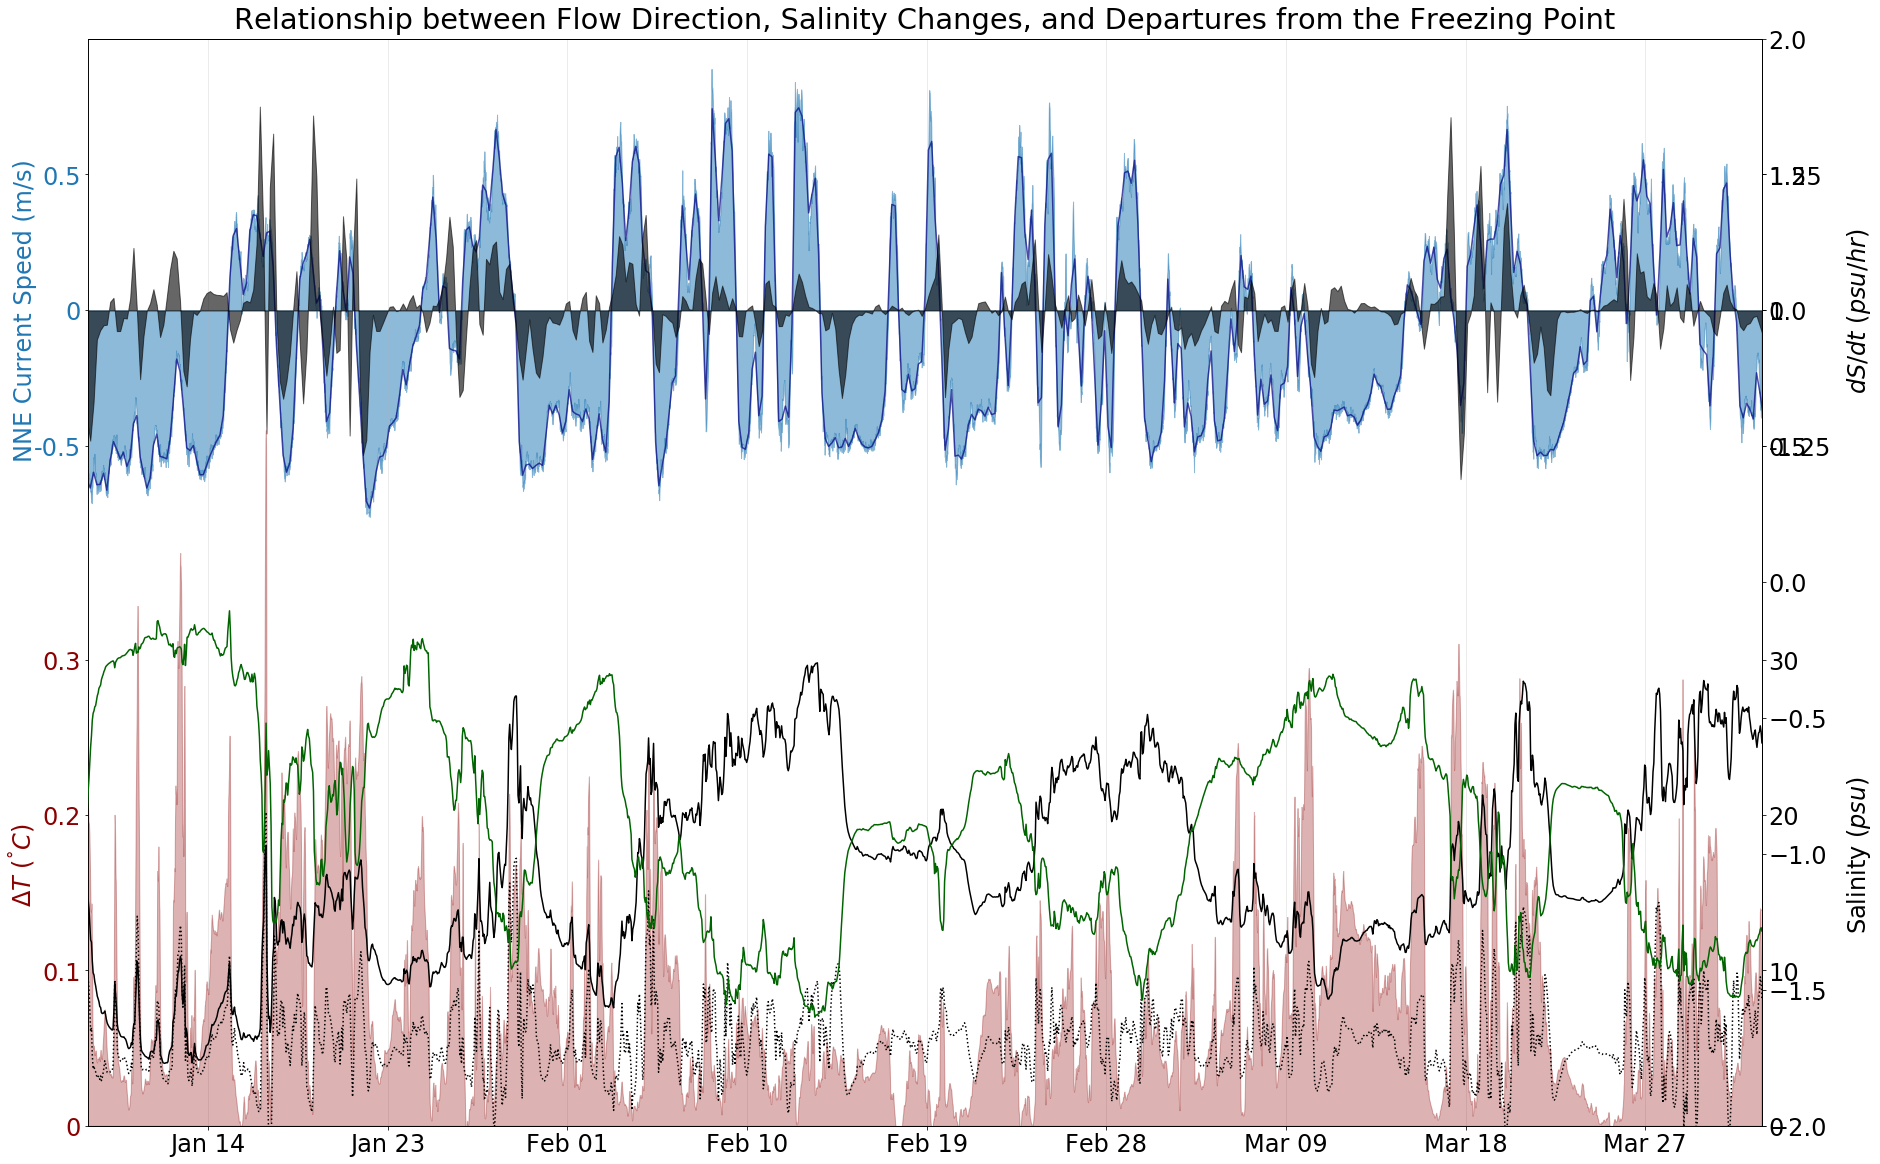

In [42]:
par0 = axx.twinx()
par0.fill_between(dSaldt.index,dSaldt,color='k',alpha=0.6)
#par0.fill_between(dTempdt.index,dTempdt*5,color='green',alpha=0.6)
par0.set_ylim([-30,10])
par0.set_yticks([-5,0,5])
par0.set_yticklabels([-5/4,0,5/4],color='k')
par0.yaxis.set_label_position('right')
par0.yaxis.set_ticks_position('right')
par0.set_ylabel('$dS/dt$ $(psu/hr)$',color='k')
par0.yaxis.set_label_coords(1.05,0.75)
par1.spines['left'].set_visible(False)


par1 = axx.twinx()
par1.fill_between(deltaT.index,deltaT,color='darkred',alpha=0.3)
par1.set_ylim([0,0.7])
par1.spines['left'].set_visible(True)
axx.spines['left'].set_bounds(0, 0.3)
axx.spines['left'].set_color('darkred')
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')
par1.set_yticks([0,0.1,0.2,0.3])
par1.set_yticklabels([0,0.1,0.2,0.3],color='darkred')
par1.set_ylabel('$\Delta T$ $(^{\degree} C)$',color='darkred')
par1.yaxis.set_label_coords(-0.03,0.24)

par2 = axx.twinx()
par2.plot(rbr.Salinity_Adjusted.resample('1H',loffset='30min').mean(),'k')
par2.set_ylim([0,70])
par2.set_yticks([0,10,20,30])
par2.set_ylabel('Salinity $(psu)$',color='k')
par2.yaxis.set_label_coords(1.05,0.25)
par2.spines['left'].set_visible(False)

par3= axx.twinx()
par3.plot(sal_hp.resample('1H',loffset='30min').mean(),'k',linestyle=':')
par3.set_ylim([-3,35])
par3.set_yticks([])
par3.spines['left'].set_visible(False)

par4 = axx.twinx()
par4.plot(rbr.Temperature.resample('1H',loffset='30min').mean(),'darkgreen')
par4.set_ylim([-2,2])
par4.spines['left'].set_visible(False)



plt.title('Relationship between Flow Direction, Salinity Changes, and Departures from the Freezing Point',pad=10)



#plt.savefig('./Figures/NewFig_FlowSaldT_v2.png',dpi=300)

Text(0.5, 1.0, 'Relationship between Flow Direction, Salinity Changes, and Departures from the Freezing Point')

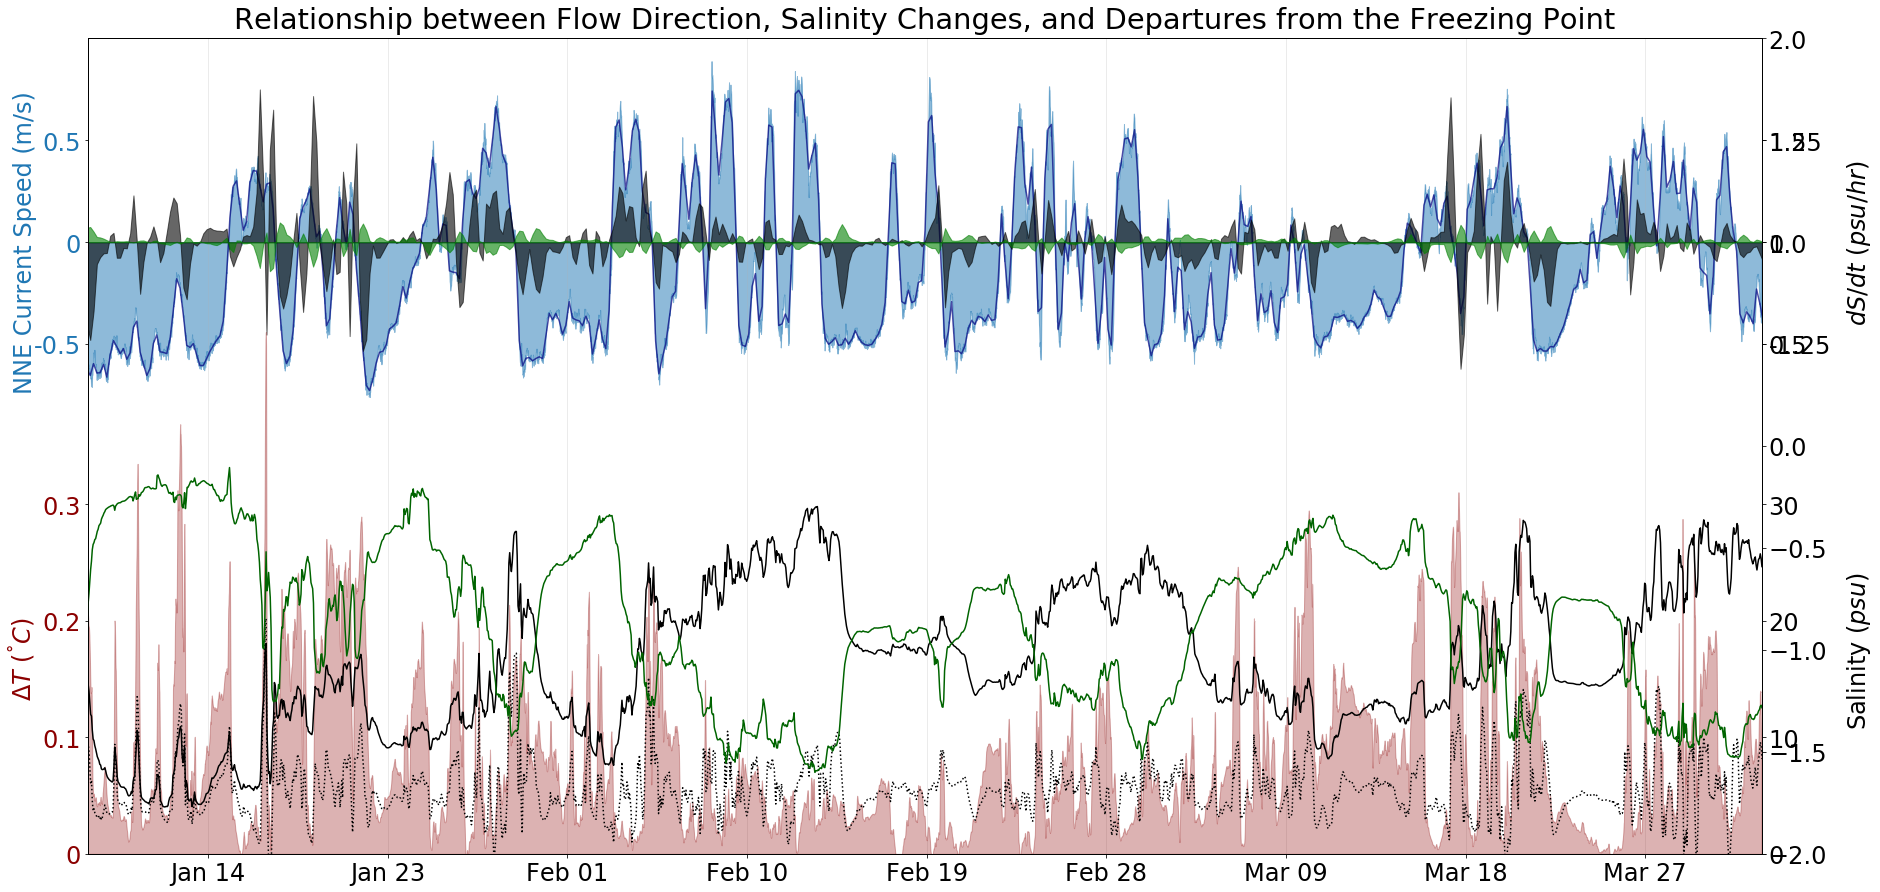

In [33]:
fig,axx = plt.subplots(figsize=(30,15),facecolor='w')
axx.fill_between(currents.time.values, currents.values, alpha=0.5,color='C0')
axx.plot(currents.to_pandas().resample(resample_freq,loffset=loffset).mean(),color='navy',alpha=0.7)
axx.set_ylim([-3,1])
axx.set_xlim([start,end])
axx.set_yticks([-0.5,0,0.5])
axx.set_yticklabels([-0.5,0,0.5],color='C0')
axx.set_ylabel('NNE Current Speed (m/s)',color='C0')
axx.yaxis.set_label_coords(-0.03,0.75)
axx.grid(axis='x',alpha=0.3)

par0 = axx.twinx()
par0.fill_between(dSaldt.index,dSaldt,color='k',alpha=0.6)
#par0.fill_between(dTempdt.index,dTempdt*5,color='green',alpha=0.6)
par0.set_ylim([-30,10])
par0.set_yticks([-5,0,5])
par0.set_yticklabels([-5/4,0,5/4],color='k')
par0.yaxis.set_label_position('right')
par0.yaxis.set_ticks_position('right')
par0.set_ylabel('$dS/dt$ $(psu/hr)$',color='k')
par0.yaxis.set_label_coords(1.05,0.75)

par1 = axx.twinx()
par1.fill_between(deltaT.index,deltaT,color='darkred',alpha=0.3)
par1.set_ylim([0,0.7])
par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')
par1.set_yticks([0,0.1,0.2,0.3])
par1.set_yticklabels([0,0.1,0.2,0.3],color='darkred')
par1.set_ylabel('$\Delta T$ $(^{\degree} C)$',color='darkred')
par1.yaxis.set_label_coords(-0.03,0.24)

par2 = axx.twinx()
par2.plot(rbr.Salinity_Adjusted.resample('1H',loffset='30min').mean(),'k')
par2.set_ylim([0,70])
par2.set_yticks([0,10,20,30])
par2.set_ylabel('Salinity $(psu)$',color='k')
par2.yaxis.set_label_coords(1.05,0.25)

par3= axx.twinx()
par3.plot(sal_hp.resample('1H',loffset='30min').mean(),'k',linestyle=':')
par3.set_ylim([-3,35])
par3.set_yticks([])

par4 = axx.twinx()
par4.plot(rbr.Temperature.resample('1H',loffset='30min').mean(),'darkgreen')
par4.set_ylim([-2,2])


axx.xaxis.set_major_locator(ticker.MultipleLocator(9))
myFmt = mdates.DateFormatter('%b %d')
axx.xaxis.set_major_formatter(myFmt);

plt.title('Relationship between Flow Direction, Salinity Changes, and Departures from the Freezing Point',pad=10)



#plt.savefig('./Figures/NewFig_FlowSaldT_v1.png',dpi=300)

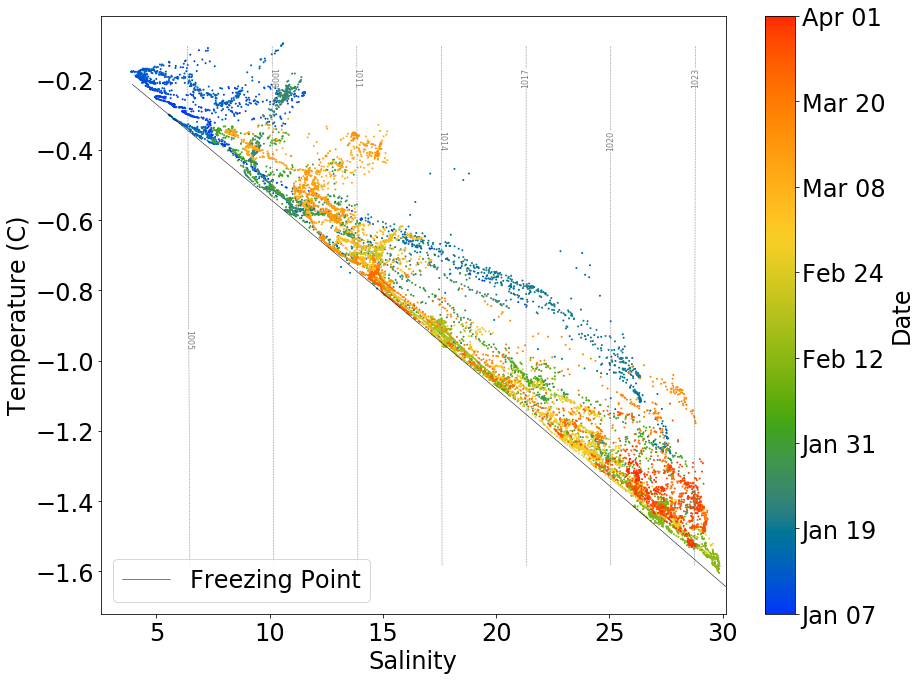

In [17]:
#-----Set Up Contours-------------#
salt = rbr.Salinity.values
temp = rbr.Temperature.values

# Figure out boudaries (mins and maxs)
smin = salt.min() - (0.01 * salt.min())
smax = salt.max() + (0.01 * salt.max())
tmin = temp.min() - (0.1 * temp.max())
tmax = temp.max() + (0.1 * temp.max())

# Calculate how many gridcells we need in the x and y dimensions
xdim = round((smax-smin)/0.1+1,0).astype(int)
ydim = round((tmax-tmin)/0.01+1,0).astype(int)

# Create empty grid of zeros
dens = np.zeros((ydim,xdim))

# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)*0.01+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin

# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)

# Substract 1000 to convert to sigma-t
#dens = dens - 1000

#----------- Plot contours----------------
fig1,ax1 = plt.subplots(figsize=(14,11))
CS = ax1.contour(si,ti,dens, linestyles='dashed',linewidths=0.5, colors='gray')#cmap='viridis_r')
plt.clabel(CS, fontsize=8, inline_spacing=1, fmt='%1.0f') # Label every second level
#cbar1 = plt.colorbar(CS)
#cbar1.set_label('Density')

#----------Plot data---------------------
#ax1.plot(salt,temp,'or',markersize=1)
h2 = ax1.scatter(salt,temp,c=rbr.index,s=1,cmap=cc.cm.rainbow)
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)');

#----------Colorbar-----------------------
N_TICKS = 8
indexes = [rbr.index[i] for i in np.linspace(0,rbr.shape[0]-1,N_TICKS).astype(int)] 
cbar2 = fig1.colorbar(h2,ax=ax1,ticks= rbr.loc[indexes].index.astype(int))
cbar2.ax.set_yticklabels([index.strftime('%b %d') for index in indexes])
cbar2.set_label('Date')

#----------Freezing Point Line-------------
pres=0
t_freeze = gsw.t_freezing(gsw.SA_from_SP(si,pres,lon,lat),pres,0)
h2 = ax1.plot(si,t_freeze,'k',linewidth=0.5)
ax1.legend(h2,['Freezing Point'],loc='lower left')

#plt.savefig('TS_diagram_v1.png')

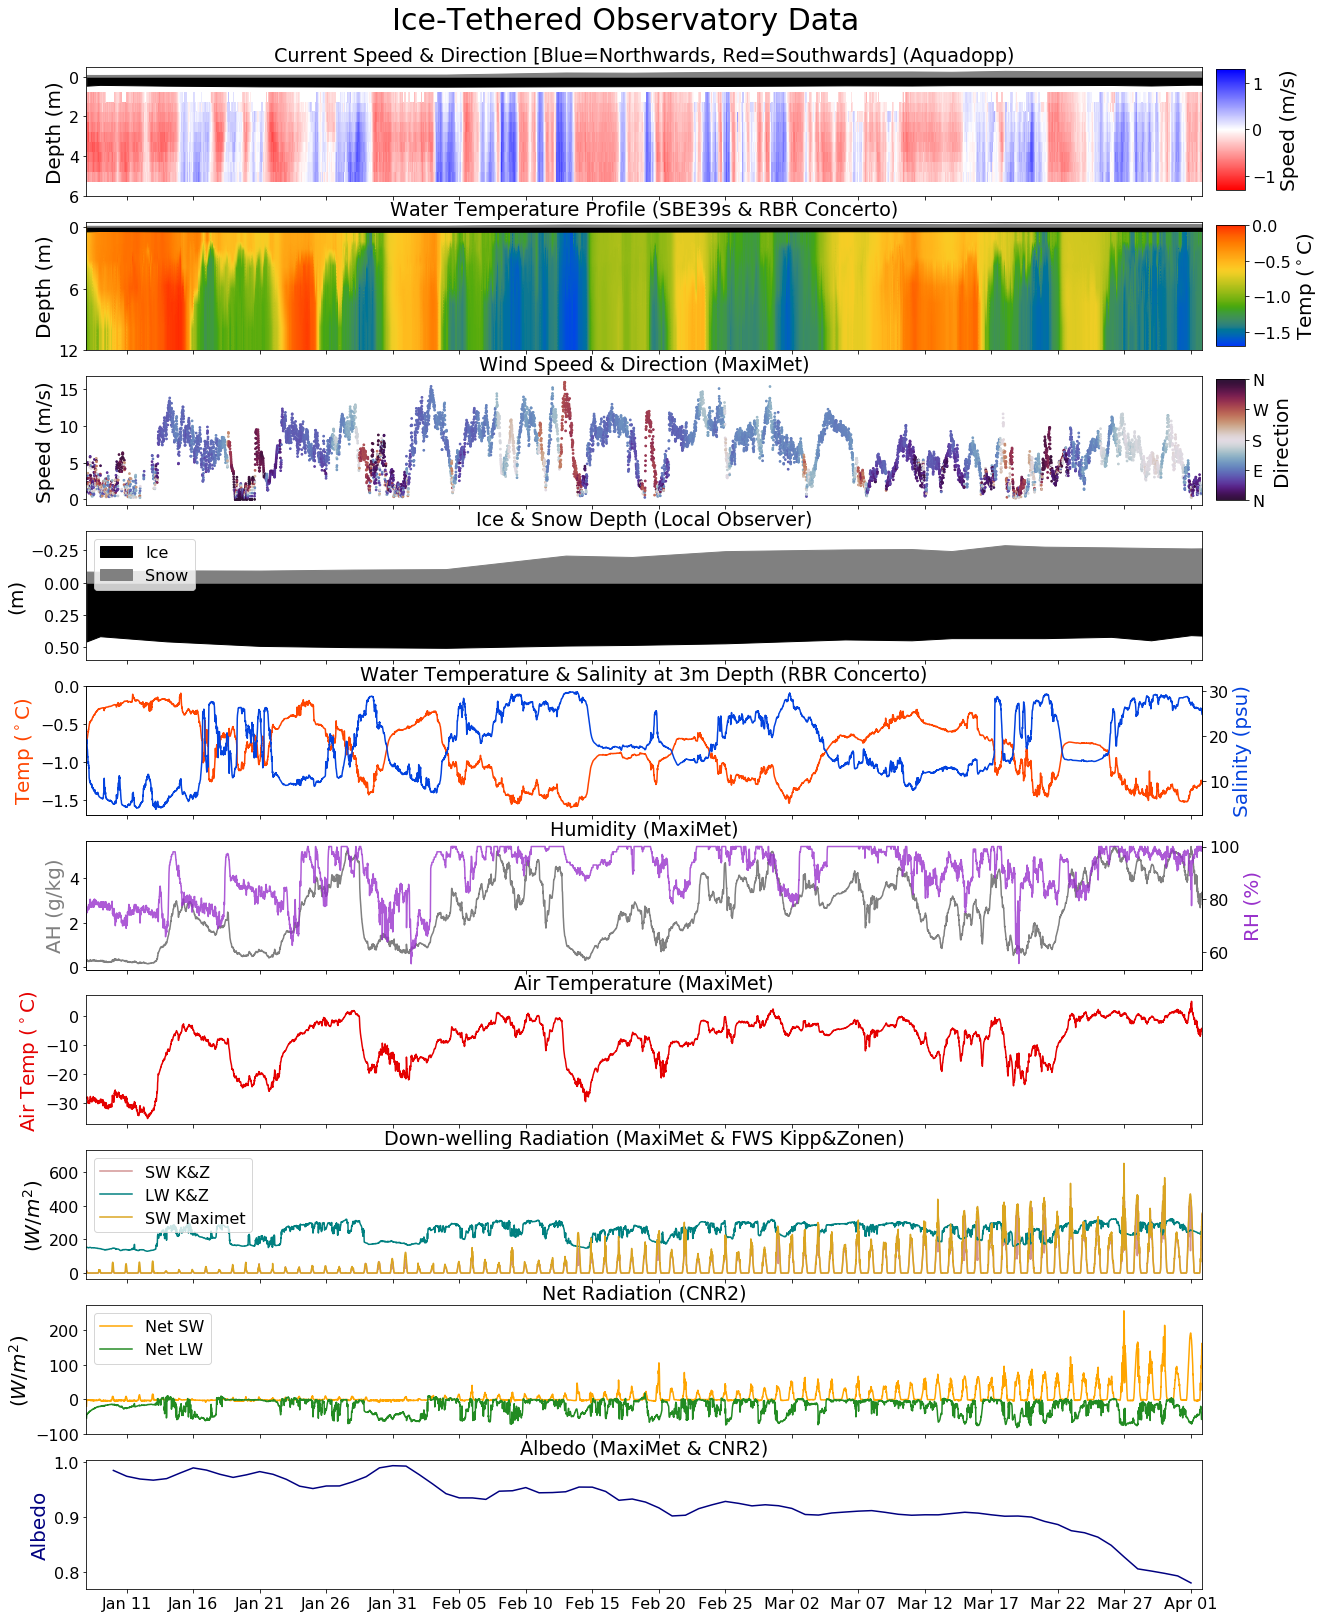

In [60]:
from IkSi_Analysis_Toolbox import plot_overview_timeseries
plot_overview_timeseries(start, end, aqd2dir, mbs_mean, tempsXrInterp, rbr, maximet, fws_rsmpl, cnr_rsmpl)

#plt.savefig('Figures/OverviewTimeseries_v3.png',dpi=300)

## Figure 7: Flux balances at both interfaces

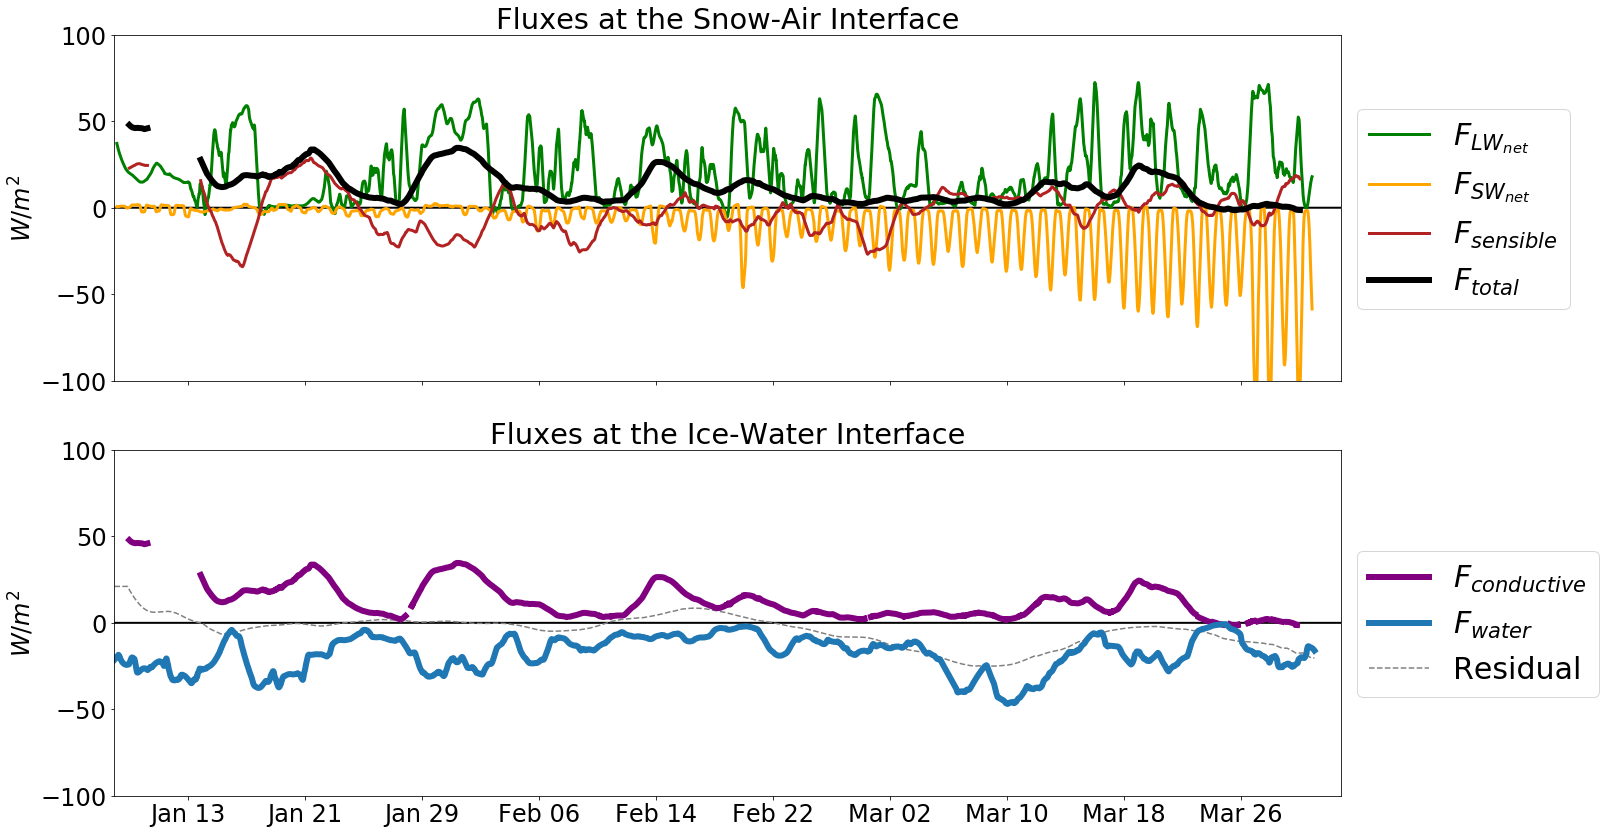

In [12]:
from IkSi_Analysis_Toolbox import calculate_ustar, calculate_deltaT, calculate_Fw, plot_flux_balances

roll=4 #number of 15-minute periods to calculate the rolling mean over
#calculate ustar
ustar = calculate_ustar(aqdXr, roll)
#calculate deltaT
rbr = calculate_deltaT(rbr, tempsXrInterp)
rbr_rsmpl = rbr.resample('15min').mean()
deltaT = rbr_rsmpl.deltaT_Adjusted.rolling(roll,center=True).mean()
#calculate ocean-ice heat flux following McPhee '92
Fw_92 = calculate_Fw(deltaT, ustar, rbr_rsmpl, lon, lat)
#Update mass balance data to reflect ice and snow thickness treating flooded snow as ice
mbs_mean = pd.read_csv(data_path + 'Ice-Tethered Observatory/mbs_mean_withflooding.csv',index_col=0,parse_dates=True,usecols=[0,1,2])
#calculate and plot flux balances at both boundaries
plot_flux_balances(mbs_mean, maximet, cnr_rsmpl, rbr_rsmpl, Fw_92)

#plt.savefig('./Figures/Flux Balances v3.png',dpi=300)

## Figure 8: Bi-directional current correlations

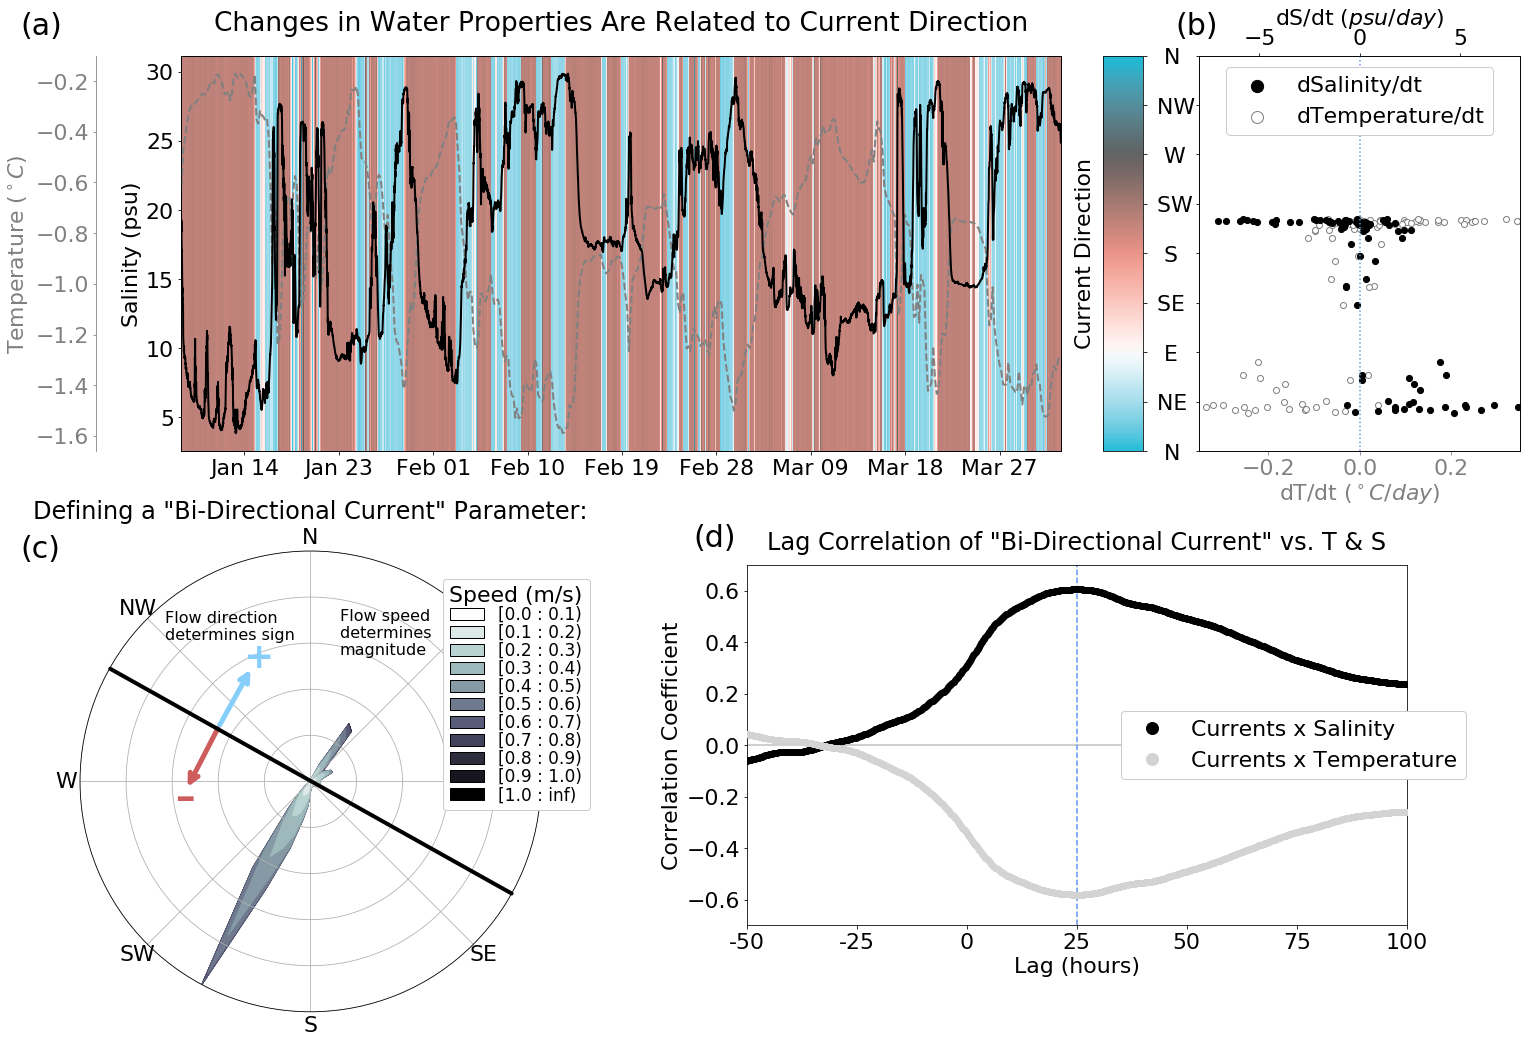

In [63]:
from IkSi_Analysis_Toolbox import currents_vs_TS
currents_vs_TS(rbr,aqdXr,aqd2dir,start,end)

#plt.savefig('Figures/TS_Currents_v2.png',dpi=300)

## Figure 9: $u_{*0}$ and St vs Re

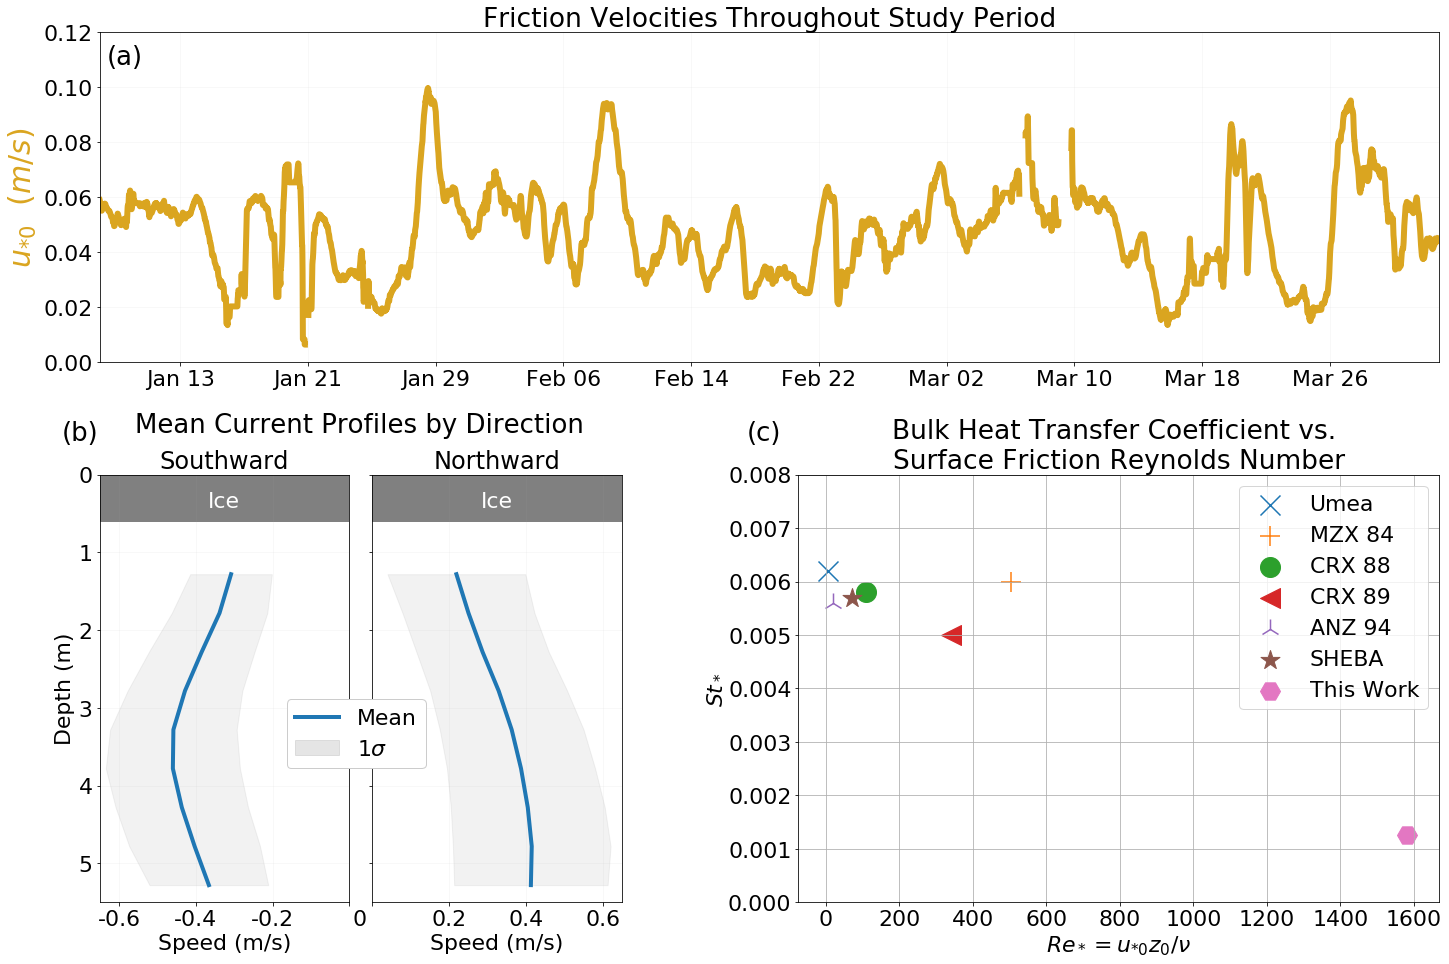

In [64]:
from IkSi_Analysis_Toolbox import plot_ustar

StvRe = pd.read_csv(data_path + 'Ice-Tethered Observatory/ReynoldsNumber_vs_StantonNumber.csv',index_col=0)

plot_ustar(ustar,aqd2dir,StvRe,start,end)

#plt.savefig('./Figures/ustar_v3.png',dpi=600)

## Figure 10: Relationship Between Salinity & Departure From Freezing Point

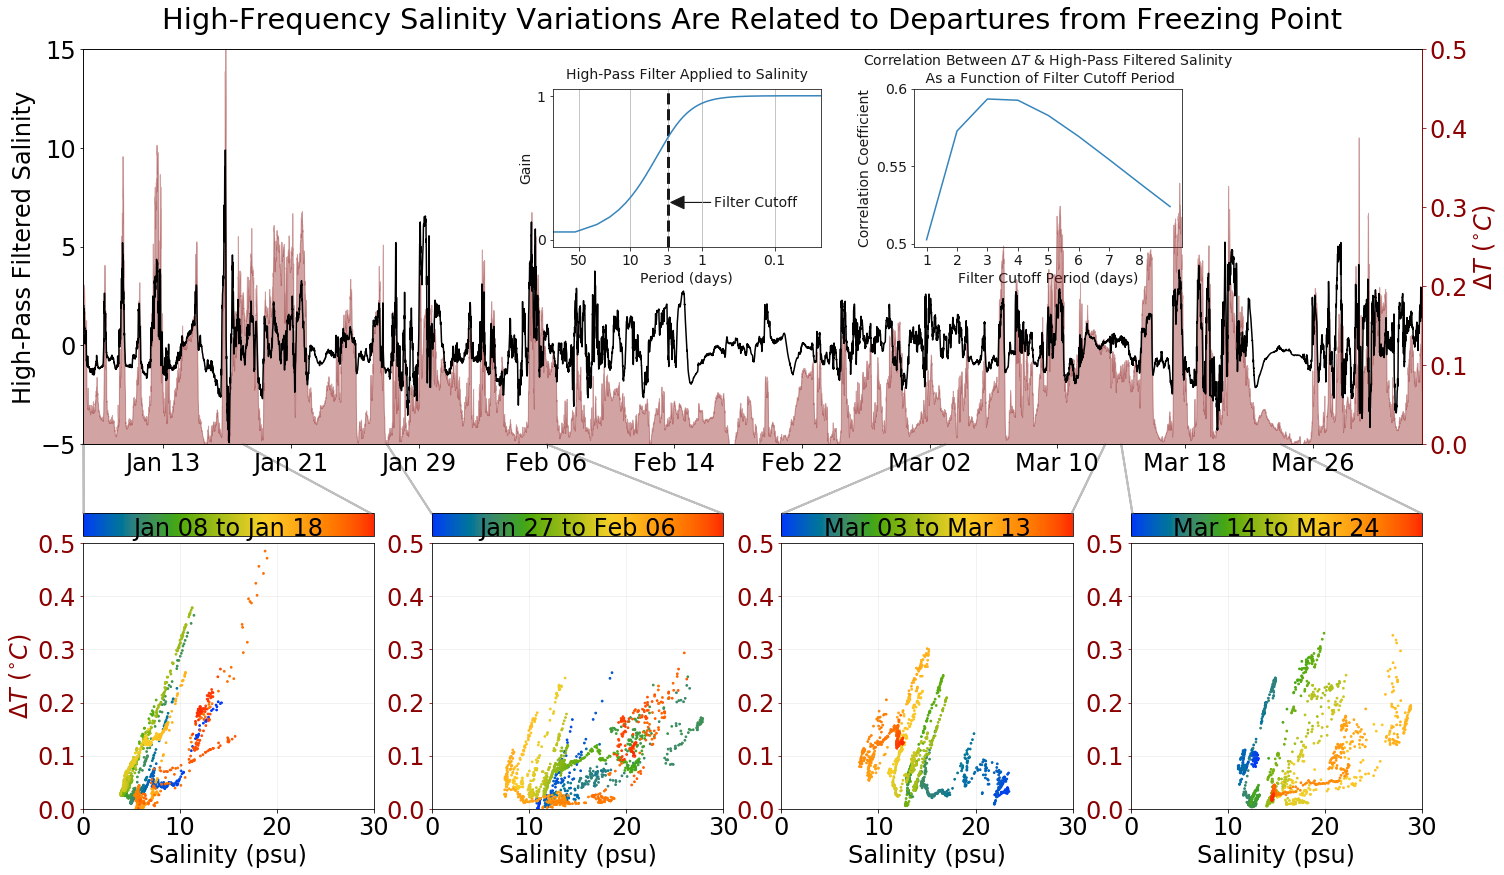

In [65]:
from IkSi_Analysis_Toolbox import plot_filtered_sal_v_deltaT

plt.rcParams.update({'font.size': 24})
plot_filtered_sal_v_deltaT(rbr, start, end)

#plt.savefig('./Figures/Sal_v_dT_v3.png',dpi=300)

## Figure 11: T-S Diagram of fall vs. spring at OBT

In [67]:
#import data
sbeOBT = pd.read_csv(data_path + 'Ocean Bottom Tripod/sbe_OBT_2019.csv',index_col=0,parse_dates=True)
sbeOBT18 = pd.read_csv(data_path + 'Ocean Bottom Tripod/sbe_OBT_2018.csv',index_col=0,parse_dates=True)

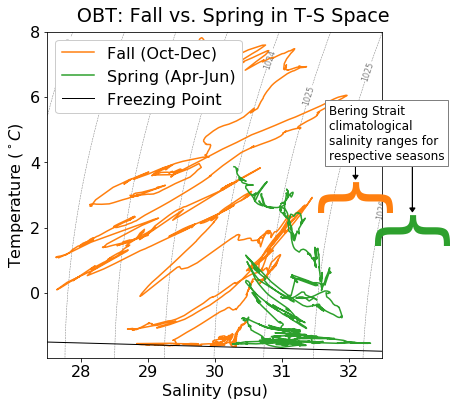

In [68]:
from IkSi_Analysis_Toolbox import plot_OBT_fallVspring_TS
plot_OBT_fallVspring_TS(sbeOBT, 
                        fall_start_18 = pd.datetime(2018,10,15,0,0,0), 
                        fall_end_18 = pd.datetime(2018,12,15,0,0,0), 
                        spring_start_19 = pd.datetime(2019,4,15,0,0,0), 
                        spring_end_19 = pd.datetime(2019,6,15,0,0,0))


#plt.savefig('./Figures/OBT_TS_FallSpring_v2.png',dpi=300,bbox_inches='tight')

## Figure 12: Temperature and Salinity at OBT - Spring and Fall

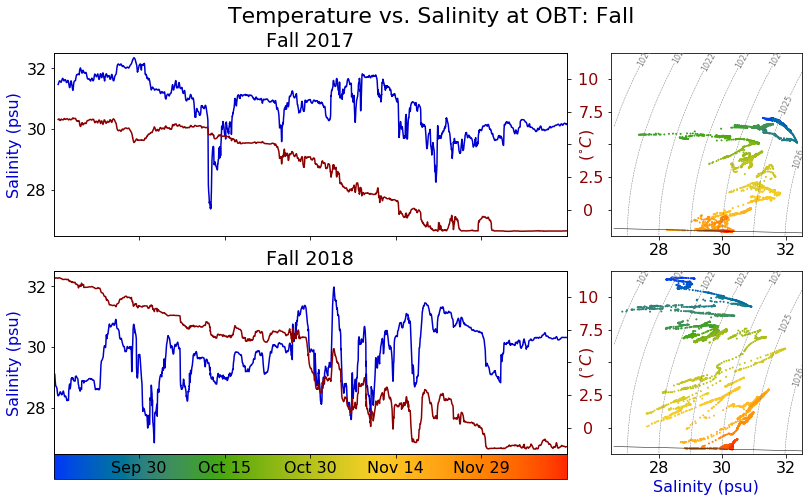

In [69]:
from IkSi_Analysis_Toolbox import plot_OBT_sections
plot_OBT_sections(sbeOBT18, sbeOBT, 
                  start1 = pd.datetime(2017,9,15,0,0,0), end1 = pd.datetime(2017,12,15,0,0,0),
                  start2 = pd.datetime(2018,9,15,0,0,0), end2 = pd.datetime(2018,12,15,0,0,0),
                  sal_lims = [26.5,32.5], 
                  temp_lims = [-2, 12], temp_ticks = [0,2.5,5,7.5,10], temp_tick_labels = ['0  ','2.5','','7.5','10 '],
                  nticks = 5, 
                  title1 = 'Fall 2017',
                  title2 = 'Fall 2018',
                  supTitle = 'Temperature vs. Salinity at OBT: Fall')

#plt.savefig('./Figures/OBT_TS_Fall_v1.png',dpi=300)

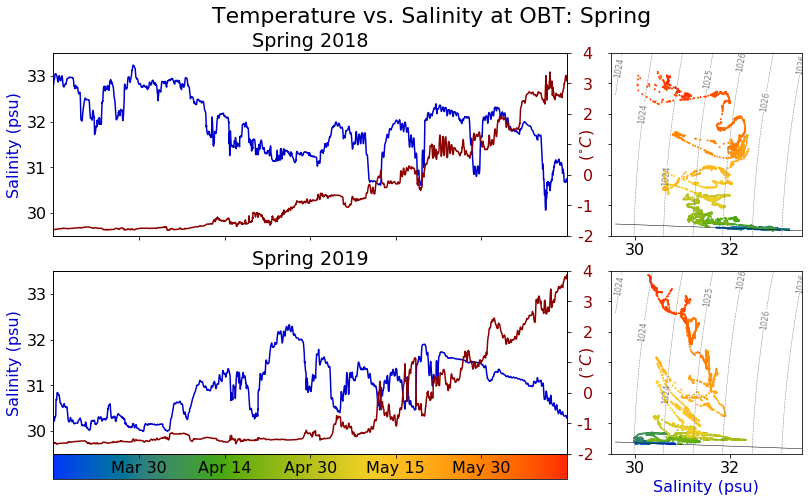

In [70]:
from IkSi_Analysis_Toolbox import plot_OBT_sections
plot_OBT_sections(sbeOBT18, sbeOBT, 
                  start1 = pd.datetime(2018,3,15,0,0,0), end1 = pd.datetime(2018,6,15,0,0,0),
                  start2 = pd.datetime(2019,3,15,0,0,0), end2 = pd.datetime(2019,6,15,0,0,0),
                  sal_lims = [29.5,33.5], 
                  temp_lims = [-2, 4], temp_ticks = [-2,-1,0,1,2,3,4], temp_tick_labels = ['-2  ','-1  ','0  ','','2  ','3  ','4  '],
                  nticks = 5, 
                  title1 = 'Spring 2018',
                  title2 = 'Spring 2019',
                  supTitle = 'Temperature vs. Salinity at OBT: Spring')

#plt.savefig('./Figures/OBT_TS_Spring_v1.png',dpi=300)

# Appendix 1: Satellite Importing and Subsetting

1.1 - These codes pull data from externally hosted OpenDAP servers, so they can take a long time to execute and they will only work insofar as those servers are still hosted in the same manner. I've left the cell as raw text rather than code to avoid accidentally executing it, but they show how the data got to where it is in the main analysis.

1.2 - creating a land mask for the sea ice data so that we can do meaningful computation on it (right now, both land and zero-ice-cover are NaNs, but we need zero-ice-cover to be 0 and land to be NaN)

In [53]:
from Satellite_SeaIce_Toolbox import subset_ssmi
#open the same data used above
si = xr.open_mfdataset(['../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2018.nc',
                        '../../Data/Satellite/Sea Ice/ASI_SSMI/si_2019.nc'])

#chop off the top part, which made the edge of the map look pretty but isn't within the bounds of the map
lon_min_bering, lon_max_bering = 175, -150
lat_min_bering, lat_max_bering = 58, 75-4.5
xmin_ssmi, xmax_ssmi = 0, 200
ymin_ssmi, ymax_ssmi = 0, 700

si_sub = subset_ssmi(si, lat_min_bering, lat_max_bering, lon_min_bering, lon_max_bering,
                     xmin_ssmi, xmax_ssmi, ymin_ssmi, ymax_ssmi)

#we need to account for the possibility of NaN meaning both zero ice and land by creating a landmask from the day when there is a minimum number of NaNs
#find the time when there is a minimum number of NaN values
nanCounts = np.isnan(si_sub.sea_ice_area_fraction).sum(dim={'x','y'})
maskTime = si_sub.where(nanCounts==nanCounts.min(),drop=True).squeeze().time.values
#create land mask using data from this time
mask_ocean = 2 * np.ones((si_sub.dims['y'], si_sub.dims['x'])) * np.isfinite(si_sub.land.sel(time=maskTime))  
mask_land = 1 * np.ones((si_sub.dims['y'], si_sub.dims['x'])) * np.isnan(si_sub.land.sel(time=maskTime))  
mask_array = mask_ocean + mask_land
#add mask to dataArray
si_sub.coords['mask'] = (('y','x'),mask_array)
si_sub.coords['mask'].attrs['Description'] = '2 for ocean, 1 for land'
#replace all nans with zeros in sea_ice_area_fraction, then re-nan everywhere that isn't ocean
si_sub['sea_ice_area_fraction'] = si_sub.sea_ice_area_fraction.fillna(0).where(si_sub.mask==2)

#save new netcdf file
si_sub.to_netcdf('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2019_masked.nc')

C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


1.3 - Importing Nasa OISST Reynolds Composite Sea Ice Product

In [ ]:
#pathh = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/200005/oisst-avhrr-v02r01.20000501.nc'
reysst = xr.open_dataset('https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/NCEI/AVHRR_OI/v2/2000/001/20000101120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc')  

In [ ]:
#define spatial limits
lat_min, lat_max = 65.479474, 68.708048
lon_min, lon_max = -169.259880, -160.007140

#define timeframe
start_date = pd.datetime(2000,1,1)
end_date = pd.datetime(2000,1,31)
ddts = pd.date_range(start=start_date,end=end_date) #"daily-date-times"

data_days = []
#----------------------------------------------------------------------------------------#
for day in ddts:
    yearmonth = day.strftime('%Y%m')
    yearmonthday = day.strftime('%Y%m%d')
    #pathh = f'http://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/{yearmonth}/avhrr-only-v2.{yearmonthday}.nc'
    pathh = f'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/{yearmonth}/oisst-avhrr-v02r01.{yearmonthday}.nc'    
    #open that day's data
    reysst = xr.open_dataset(pathh)
    
    #slice data and plot into map
    reysst.sst.sel(lat=slice(lat_min,lat_max), 
                   lon=slice((lon_min+360)%360, (lon_max+360)%360))
    
    data_days.append(reysst)
    
sst = xr.auto_combine(data_days)
sst